In [8]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [35]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [36]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [37]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : bundaberg
Processing Record 2 of Set 1 : kodiak
Processing Record 3 of Set 1 : nikolskoye
City not found. Skipping...
Processing Record 4 of Set 1 : deputatskiy
Processing Record 5 of Set 1 : murupara
Processing Record 6 of Set 1 : bubaque
Processing Record 7 of Set 1 : busselton
Processing Record 8 of Set 1 : yellowknife
Processing Record 9 of Set 1 : mar del plata
Processing Record 10 of Set 1 : hobart
Processing Record 11 of Set 1 : jamestown
Processing Record 12 of Set 1 : jalu
Processing Record 13 of Set 1 : verkhnetulomskiy
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 1 : tuatapere
Processing Record 15 of Set 1 : te anau
Processing Record 16 of Set 1 : waitakere
Processing Record 17 of Set 1 : saint-augustin
Processing Record 18 of Set 1 : vaini
City not found. Skipping...
Processing Record 19 of Set 1 : urucara
Processing Record 20 of Set 1 : georgetown
P

In [38]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list})

In [39]:
# Count
weather_dict.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

In [40]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bundaberg,22,AU,1614107869,88,-24.8500,152.3500,75.99,5.75
1,Saint Paul Harbor,1,US,1614107869,68,57.7900,-152.4072,21.20,5.75
2,Nikolskoye,90,RU,1614107869,79,59.7035,30.7861,12.20,11.18
3,Deputatsky,54,RU,1614107870,81,69.3000,139.9000,-29.40,2.68
4,Murupara,24,NZ,1614107870,98,-38.4667,176.7000,62.01,1.21
...,...,...,...,...,...,...,...,...,...
567,Saint-François,0,FR,1614108048,67,46.4154,3.9054,55.40,4.61
568,Havre-St-Pierre,90,CA,1614108048,86,50.2334,-63.5986,28.40,14.97
569,Khovd,43,MN,1614108048,73,48.0056,91.6419,20.64,5.75
570,Panzhihua,0,CN,1614108049,52,26.5851,101.7128,48.99,0.38


In [41]:
# Save city data into a csv file
weather_dict.to_csv("output_data/cities.csv", index = False)

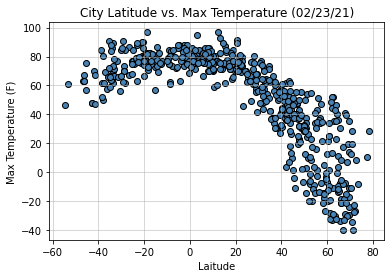

In [42]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (02/23/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Max Temperature.png")

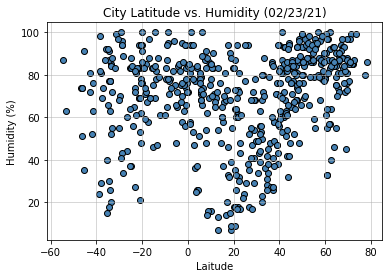

In [43]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (02/23/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Humidity.png")

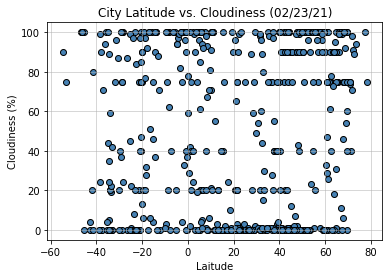

In [44]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (02/23/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Cloudiness.png")

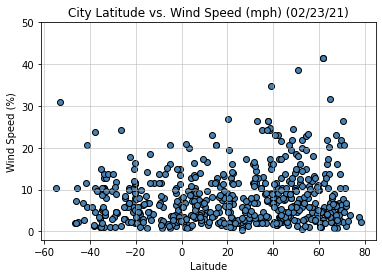

In [45]:
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (02/23/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Wind Speed (mph).png")

In [46]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [47]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.85


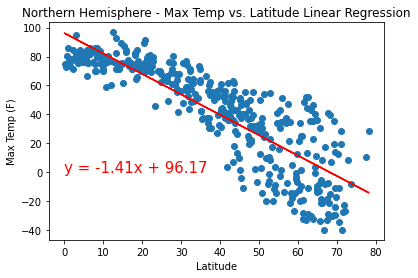

In [48]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

In [49]:
# There is a strong negative correlation between latitude and max temperature for northern hemisphere.



The r-squared is : 0.52


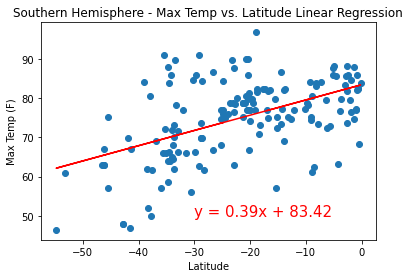

In [50]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

In [51]:
# There is a moderate positive correlation between latitude and max temperature for southern hemisphere.



The r-squared is : 0.38


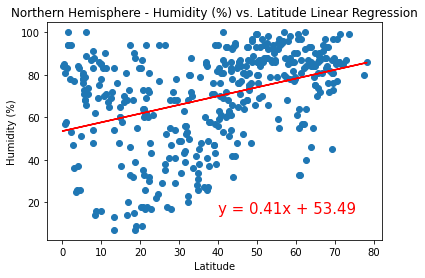

In [52]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

In [53]:
# There is a moderate positive correlation between latitude and humidity for northern hemisphere.

The r-squared is : 0.19


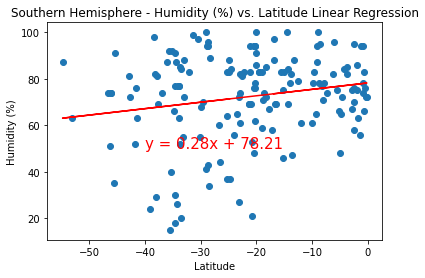

In [54]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

In [55]:
# There is a weak positive correlation between latitude and humidity for southern hemisphere.



The r-squared is : 0.27


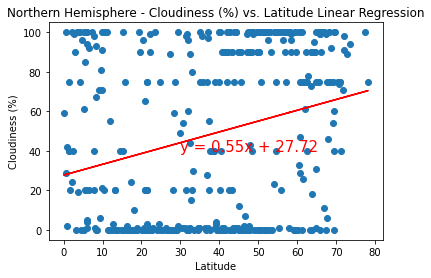

In [56]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [57]:
# There is a weak positive correlation between latitude and cloudiness for northern hemisphere.



The r-squared is : 0.21


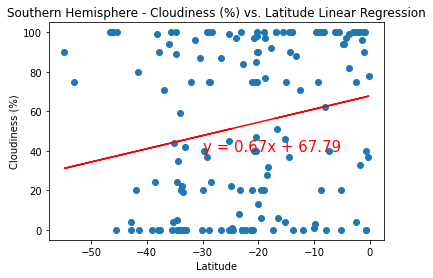

In [58]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [59]:
# There is a weak positive correlation between latitude and cloudiness for southern hemisphere.



The r-squared is : 0.1


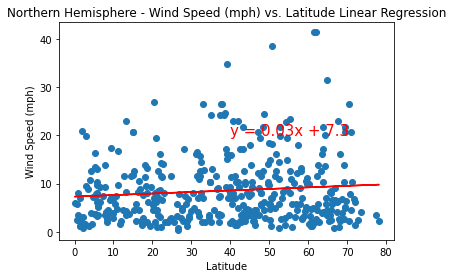

In [60]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

In [61]:
# There is a weak positive correlation between latitude and windspeed for northern hemisphere.



The r-squared is : -0.07


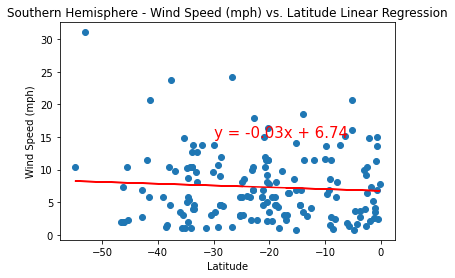

In [62]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

In [ ]:
# There is a weak negative correlation between latitude and wind speed for southern hemisphere.